
# Project: Investigate a Dataset - [TMDB Movie Ratings]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#discussion">Discussion</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, popularity, directors responsible, runtime, budget, and revenue. The following is a list of all the present variables and a description where necessary:

| Variable | Description |
| --- | --- |
| id | --- |
| imdb_id | --- |
| original_title | Title of the movie |
| popularity | A score between 1 and 0 representing user ratings |
| budget | Production budget for the movie |
| revenue | The box-office revenue after movie release |
| cast | Main actors |
| homepage | --- |
| director | The director responsible for the movie |
| tagline | --- |
| keywords | --- |
| overview | --- |
| runtime | The time the film lasts |
| genres | --- |
| production_companies | The production company responsible |
| release_date | Exact date of release |
| vote_count | --- |
| vote_average | --- |
| release_year | Gaussian |
| budget_adj | Budget adjusted for inflation |
| revenue_adj | Revenue adjusted for inflation |



### Questions for Analysis


### Research questions

1. Who has directed the most movies?
2. Which genres are most popular from year to year? 
3. What kinds of properties are associated with movies that have high revenues?
4. What was the average budget for movies?
5. What was the average box office revenue?



In [1]:
# Importing necessary packages, pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [6]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Let us first load the data and print the first few lines

In [2]:
# Loads the data and prints out a few lines
df = pd.read_csv('imdb_movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#prints the last few lines of the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


I shall now use info() to check for possible missing values and incorrect data types.

In [4]:
#checking for possible missing values and incorrect data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To get a clear picture of summary statistical characteristics of the dataset, I use describe(). This will give me the mean, standard deviation, count and percentile values for numeric datasets.

In [5]:
#gives a general idea of the characteristics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The function shape will give me the number of rows and columns in the dataset.

In [6]:
#shows the number of rows and columns
df.shape

(10866, 21)

Getting all the column names gets me all the variables present in the dataset.

In [7]:
#gives the column names 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
#returns the number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

A key problem we found in this dataset is that release_date is not presented correctly as a date but rather as an object. We will correct this later. There also exists missing values in some variables. Them being non-numeric means we will not concern ourselves with correcting that. 


### Data Cleaning
 

A good idea at this point will be to check for any duplicates in the data we have and remove them.

In [9]:
# shows the number of duplicates in the dataset
sum(df.duplicated())

1

In [10]:
#returns number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [11]:
#removes duplicates
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [12]:
#checks if duplicates are still there
sum(df.duplicated())

1

The next cell below changes the data type of release_date to datetime.

In [13]:
#changes the data type of release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
#rechecks for missing values and other problems
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

> We have now succesfully cleaned our data and can move on to EDA(Exploratory Data Analysis).

<a id='eda'></a>
## Exploratory Data Analysis


Now that we have cleaned our data, we can begin by answering some of the questions we posed in the introduction section.

### 1. Most Popular Genres By Year

In [19]:
#groups data by year and prints the first fw lines
df_a = df.groupby('release_year')
df_a.head()

#defines a new function that prints the most watched genres by year
def genres_by_year():
    print(df_a['genres'].value_counts())

genres_by_year()

release_year  genres                          
1960          Horror                              3
              Comedy                              2
              Comedy|Drama|Romance                2
              Comedy|Romance                      2
              Drama                               2
                                                 ..
2015          War|Action                          1
              War|Adventure|Science Fiction       1
              War|Drama                           1
              Western|Drama                       1
              Western|Drama|Adventure|Thriller    1
Name: genres, Length: 6099, dtype: int64


### 2.  Properties Associated With Movies That Have Higher Revenue

To answer this question, scatterplots will be plotted on adjusted revenue versus different properties, beginning with the budget allocated to the movie. 
Below are all the properties plotted with adjusted revenue.

In [16]:
def plot(x, y, x_label, y_label, title):
    plt.scatter( x , y)
    plt.xlabel(  x_label )
    plt.ylabel(y_label)
    plt.title( title )
    plt.figure(figsize = [10, 10])
    plt.draw()

> #### 2.1 Does Having A Higher Budget Mean Having a Higher Revenue?

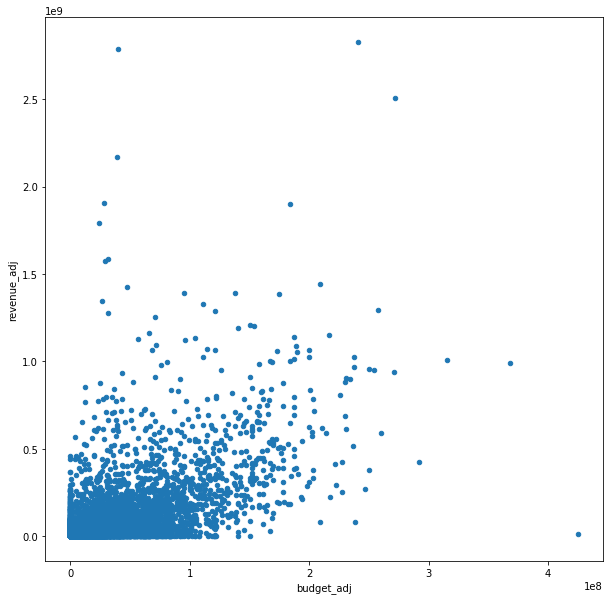

In [17]:
#displays a scatter plot of adjusted budget versus adjusted revenue
df.plot.scatter('budget_adj', 'revenue_adj', figsize=(10,10))

A larger budget does seem to correlate with a larger adjusted revenue, although the relationship does not seem as linear as desired from this scatterplot.

> #### 2.2 Does Runtime Affect Revenue

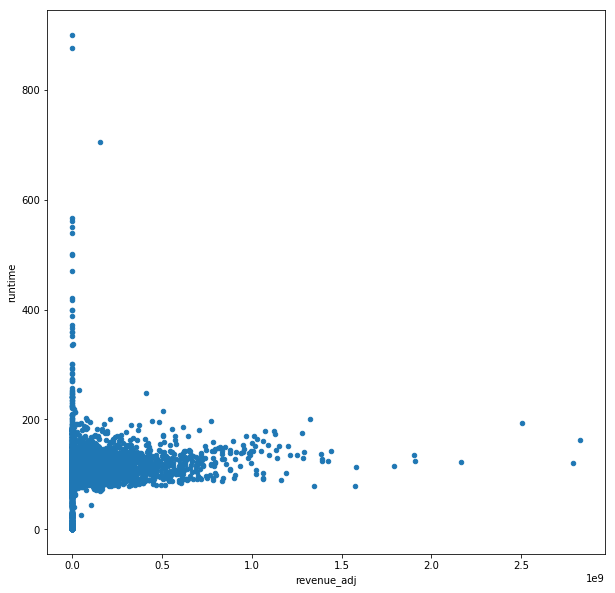

In [17]:
#displays a scatter plot of runtime versus adjusted revenue
df.plot.scatter('revenue_adj', 'runtime', figsize=(10,10))

An increase in runtime does not positively affect the revenue that a film makes as this scatterplot clearly shows. It is the case, but not of relevance to this question, that the film industry prefers an average runtime of 100 minutes. Other aspects of movies clearly explain this better.

> #### 2.3 Is the movie's year of release a factor that affects revenue?

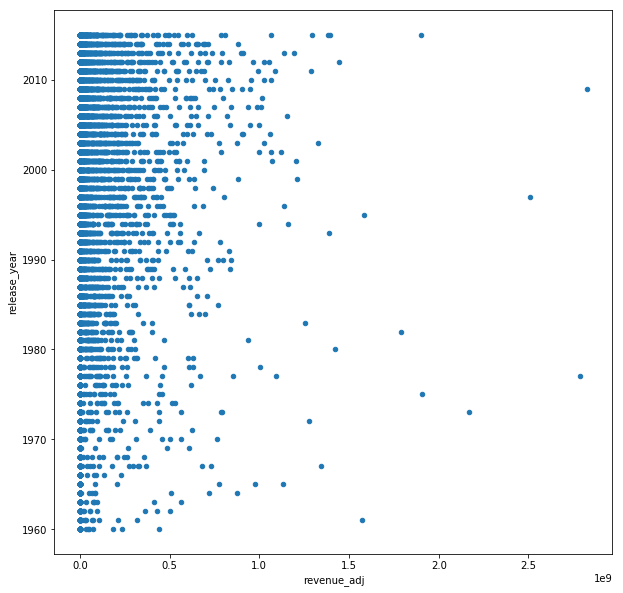

In [18]:
#displays a scatter plot of release year versus adjusted revenue
df.plot.scatter('revenue_adj', 'release_year', figsize=(10,10))

This scatterplot shows an increase in the number of movies produced year on year. It is not at all clear that box office revenue has increased with an increase in the year of release.

### 3. Who has directed most movies?

We can use value_counts() to get the total number of movies each director has been featured in.

Woody Allen                                 45
Clint Eastwood                              34
Steven Spielberg                            29
Martin Scorsese                             29
Ridley Scott                                23
Steven Soderbergh                           22
Ron Howard                                  22
Joel Schumacher                             21
Brian De Palma                              20
Barry Levinson                              19
Wes Craven                                  19
Tim Burton                                  19
Mike Nichols                                18
David Cronenberg                            18
John Carpenter                              18
Rob Reiner                                  18
Walter Hill                                 17
Renny Harlin                                17
Stephen Frears                              17
Spike Lee                                   17
Sidney Lumet                                17
Robert Zemeck

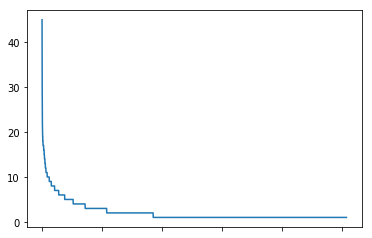

In [19]:
#gets the number of times a director is in the 'director' column thus finding the number of movies he/she has directed. This is then plotted
print(df['director'].value_counts())
df['director'].value_counts().plot()
plt.show()

The answer is quite clearly Woody Allen.

### 4. What was the average budget for movies?

In [20]:
#gives the mean of the movie budgets
df['budget_adj'].mean()

17551039.82288678

### 5. What was the average revenue for movies ?

In [21]:
##gives the mean of the movie revenue 
df['revenue_adj'].mean()

51364363.253250986

<a id='discussion'></a>
## Discussion

> This project investigated the TMDB(The Movie Database) dataset containing 10,000 movies and information pertaining to directors, actors, budgets, revenues, and popularity among others. To perform this investigation the project has been subdivided into sections. They include an introduction, data wrangling section, EDA, discussion, conclusions and limitations sections.
> The introduction gave a detailed description of the dataset and the different variables present. It also outlined the research questions that are expected to be answered at the end of this project. These include;
1. Who has directed the most movies?
2. Which genres are most popular from year to year?
3. What kinds of properties are associated with movies that have high revenues?
4. What was the average budget for movies?
5. What was the average box office revenue?

> To clean the data and deal with any messiness, the data wrangling section got rid of any duplicates and changed the inaccurate data types witnessed in the dataset. 
> After data has been effectively cleaned, exploring it to answer the questions posed earlier can be done. The findings are summarised below.

> Woody Allen has directed the most movies.

> Budget is the variable that influences revenue the most out of the ones tested(budget, runtime, and year of release). This makes sense as the larger the budget a production company has at its disposal to create a movie, the higher the chance that the creation is of the best quality, and will thus attract the most viewers. Marketing expenses also come in place in this vraiable.

> The average budget spent on a movie is 17,551,039. About 18 million US dollars.

> The average collected revenue after a movie release is about USD 51 million.

<a id='conclusions'></a>
## Conclusions


> The properties that seems to influence revenue the most is the budget. There is little to no link between runtime and the adjusted revenue. There is a small amount of evidence that the latest movies have been scoring higher revenues, although this has not been scientifically tested.

> Woody Allen has directed the most movies with a total of 43 between the years 1960 and 2015. Clint eastwood comes second with 34 while Martin Scorcese and Steve Spielberg come third with 29 movies each. Plotting the directors and the amount of movies gives the Pareto distribution, a distribution famous for describing social, scientific, and geophysical phenomena in society. It is most commonly associated with inequality and the bible verse, "I tell you, that to every one who has will more be given; but from him who has not, even what he has will be taken away."

> It is also quite clear that most movies collect at least 3X their budget in revenue.

<a id='limitations'></a>
## Limitations

> In finding the most popular genre by year, the research into this was limited as it did not provide a summary list of the genres broken down by year, but would instead have to be run again to get one for a specific year.

> Other limitations present in this analysis is a lack of statistical analysis done to answer any of these questions. For example correlation tests could've been conducted as part of the bivariate analysis in order to find if any correlation exists between revenue with runtime and budget.




## Submitting your Project 



In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0